<a href="https://colab.research.google.com/github/jhamandeep/Neural/blob/main/Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

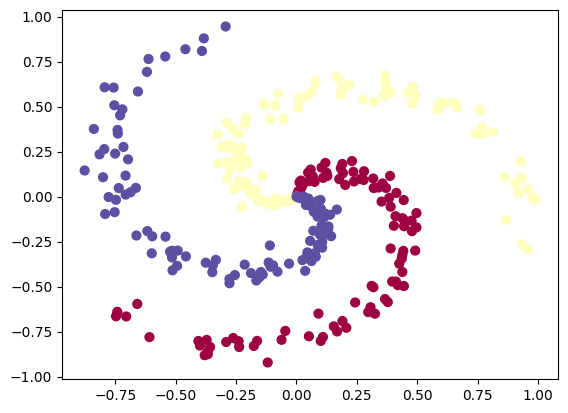

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
X = X.T
Y = y.reshape(1, -1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (2, 300)
Shape of Y: (1, 300)


In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(3) # consistent random numbers

    # Layer 1 (Hidden): Connects Input (n_x) to Hidden (n_h)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    # Layer 2 (Output): Connects Hidden (n_h) to Output (n_y)
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [16]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The softmax output
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Layer 1: Input to Hidden
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    # Layer 2: Hidden to Output
    Z2 = np.dot(W2, A1) + b2   # <--- Updated to use A1
    A2 = softmax(Z2)           # <--- Uses your helper function

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [18]:
def compute_cost(A2, Y):
    m = Y.shape[1]

    # 1. Calculate log probabilities for the correct classes
    logprobs = np.log(A2[Y[0], np.arange(m)])

    # 2. Compute the average cost
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))  # Makes sure cost is a number, not an array

    return cost

In [22]:
n_x = X.shape[0]
n_h = 4 # You can try different values for this
n_y = K # K is the number of classes defined earlier

parameters = initialize_parameters(n_x, n_h, n_y)

# 1. Forward Propagation
A2, cache = forward_propagation(X, parameters)

# 2. Compute Cost
cost = compute_cost(A2, Y)

print("Cost =", cost)

Cost = 1.0986249772223424
